<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Vehicle_Detection_raw_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing all necessary libraries
import cv2
import os

# Read the video from specified path
cam = cv2.VideoCapture("/content/drive/MyDrive/Accident videos-20220327T062154Z-001/Accident videos/CTO20100506_toAVI.avi")

try:
	
	# creating a folder named data
	if not os.path.exists('data'):
		os.makedirs('data')

# if not created then raise error
except OSError:
	print ('Error: Creating directory of data')

# frame
currentframe = 0

while(True):
	
	# reading from frame
	ret,frame = cam.read()

	if ret:
		# if video is still left continue creating images
		name = './data/frame' + str(currentframe) + '.jpg'
		print ('Creating...' + name)

		# writing the extracted images
		cv2.imwrite(name, frame)

		# increasing counter so that it will
		# show how many frames are created
		currentframe += 1
	else:
		break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()


Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Creating..../data/frame10.jpg
Creating..../data/frame11.jpg
Creating..../data/frame12.jpg
Creating..../data/frame13.jpg
Creating..../data/frame14.jpg
Creating..../data/frame15.jpg
Creating..../data/frame16.jpg
Creating..../data/frame17.jpg
Creating..../data/frame18.jpg
Creating..../data/frame19.jpg
Creating..../data/frame20.jpg
Creating..../data/frame21.jpg
Creating..../data/frame22.jpg
Creating..../data/frame23.jpg
Creating..../data/frame24.jpg
Creating..../data/frame25.jpg
Creating..../data/frame26.jpg
Creating..../data/frame27.jpg
Creating..../data/frame28.jpg
Creating..../data/frame29.jpg
Creating..../data/frame30.jpg
Creating..../data/frame31.jpg
Creating..../data/frame32.jpg
Creating..../data/fr

In [4]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage import io

In [5]:
# get file names of the frames
col_frames = os.listdir('/content/data/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('/content/data/'+ i)
    # append the frames to the list
    col_images.append(img)

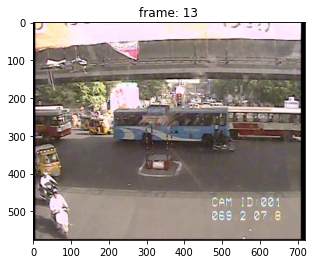

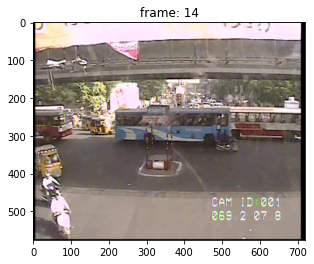

In [6]:
# plot 13th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

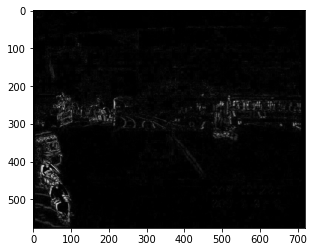

In [7]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[13], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[14], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

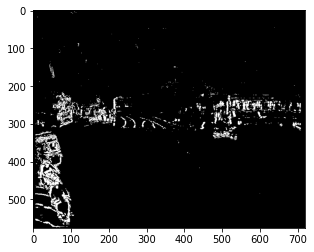

In [8]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

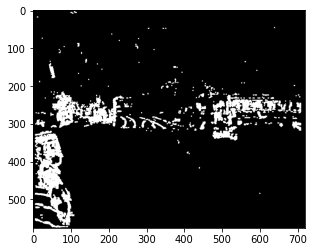

In [9]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

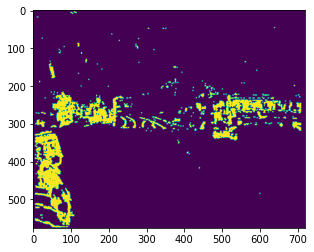

In [10]:

# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

In [11]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [12]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

27

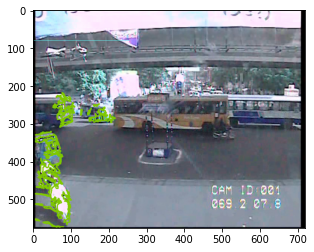

In [13]:

dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [16]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "/content/drive/MyDrive/contour_frames_3/"
#os.mkdir(pathIn)

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [34]:
# specify video name
pathOut = 'vehicle_detection_v3.mp4'

# specify frames per second
fps = 14.0

In [35]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
print(len(files))

4198


In [36]:

files.sort(key=lambda f: int(re.sub('\D', '', f)))
print(len(files))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    print(size)
    
    #inserting the frames into an image array
    frame_array.append(img)

4198
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720, 576)
(720,

In [37]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()
cv2.destroyAllWindows()

In [38]:
type(out)

cv2.VideoWriter

In [39]:
from google.colab import files
files.download('out')

FileNotFoundError: ignored